In [24]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Данные матрицы смежности
adj_matrix = pd.read_csv('data/los_adj.csv', header=None)
speed_matrix = pd.read_csv('data/los_speed.csv')
speed_matrix.columns = np.arange(speed_matrix.shape[1])
adj_matrix = adj_matrix - np.eye(adj_matrix.shape[0])

# Создание графа
G = nx.Graph()

# Добавление рёбер без самопетлей
for i in range(len(adj_matrix)):
    for j in range(i+1, len(adj_matrix)):  # Исключаем самопетли и дублирование рёбер
        weight = adj_matrix.iloc[i, j]
        if weight != 0:  # Если вес не равен 0, добавляем ребро
            G.add_edge(i, j, weight=weight)

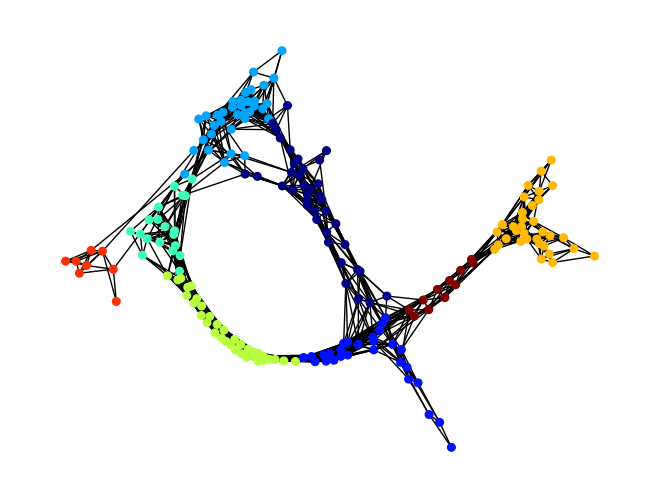

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import community

#nx.transitivity(G)

# Find modularity
part = community.community_louvain.best_partition(G)
mod = community.modularity(part,G)

# Plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [26]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))
print('values in communities')
sorted(c[0])
print('nodes in 1st community', sorted(c[0]))
print('nodes in 2nd community', sorted(c[1]))
print('nodes in 3nd community', sorted(c[2]))
print('nodes in 4nd community', sorted(c[3]))
len(c)

values in communities
nodes in 1st community [8, 9, 10, 14, 19, 20, 22, 31, 32, 34, 39, 40, 41, 43, 47, 52, 57, 59, 60, 63, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 81, 82, 83, 84, 86, 87, 88, 89, 90, 94, 96, 98, 99, 100, 102, 103, 104, 113, 119, 122, 130, 131, 137, 141, 146, 148, 149, 150, 151, 156, 158, 164, 172, 175, 176, 180, 181, 182, 185, 186, 190, 197, 204, 205]
nodes in 2nd community [0, 1, 2, 7, 11, 13, 24, 25, 27, 28, 36, 37, 42, 44, 45, 49, 51, 53, 54, 55, 58, 61, 62, 66, 67, 78, 79, 85, 92, 95, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 120, 123, 125, 129, 132, 133, 135, 139, 140, 142, 143, 145, 147, 152, 153, 167, 168, 169, 171, 173, 177, 178, 179, 183, 184, 194, 199, 201, 202, 203]
nodes in 3nd community [3, 4, 5, 6, 12, 15, 16, 17, 23, 29, 30, 33, 38, 48, 56, 64, 65, 80, 91, 93, 97, 101, 124, 127, 128, 134, 136, 138, 144, 154, 155, 157, 159, 160, 161, 162, 163, 165, 166, 170, 174, 187, 188, 191, 192, 193, 195, 196, 198, 206]
nodes in 4nd community [1

4

In [27]:
speed_matrix

,0,1,2,3,4,5,6,7,8,9,...,197,198,199,200,201,202,203,204,205,206
0,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125000,67.125000,59.625000,62.750000,...,45.625000,65.500000,64.500000,66.428571,66.875000,59.375000,69.000000,59.250000,69.000000,61.875000
1,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000000,65.000000,57.444444,63.333333,...,50.666667,69.875000,66.666667,58.555556,62.000000,61.111111,64.444444,55.888889,68.444444,62.875000
2,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500000,64.250000,63.875000,65.375000,...,44.125000,69.000000,56.500000,59.250000,68.125000,62.500000,65.625000,61.375000,69.857143,62.000000
3,61.777778,65.500000,62.555556,59.888889,66.777778,67.166667,63.222222,65.277778,63.583333,64.694444,...,43.416667,69.333333,60.444444,58.611111,67.416667,59.888889,65.305556,60.138889,69.571429,60.444444
4,59.555556,67.250000,65.111111,60.777778,67.055556,68.083333,61.944444,66.305556,63.291667,64.013889,...,42.708333,69.666667,64.388889,57.972222,66.708333,57.277778,64.986111,58.902778,69.285714,58.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,65.555556,65.111111,64.111111,61.111111,66.000000,66.777778,64.777778,58.000000,61.444444,65.875000,...,47.000000,69.000000,62.666667,67.222222,68.222222,55.333333,67.333333,62.000000,64.444444,64.111111
2012,66.625000,66.625000,65.750000,64.750000,67.375000,67.500000,67.250000,64.500000,57.875000,65.714286,...,42.250000,68.000000,64.375000,57.750000,67.500000,66.625000,57.750000,61.875000,66.125000,63.875000
2013,66.375000,66.375000,63.750000,63.750000,67.625000,68.375000,65.000000,64.625000,61.125000,62.000000,...,45.750000,65.000000,64.500000,65.750000,64.375000,65.375000,68.875000,60.625000,69.625000,62.375000
2014,64.666667,66.555556,66.888889,59.888889,65.111111,67.000000,65.111111,66.000000,65.111111,65.000000,...,44.555556,69.222222,59.000000,58.444444,66.666667,65.222222,68.222222,59.444444,68.333333,62.888889


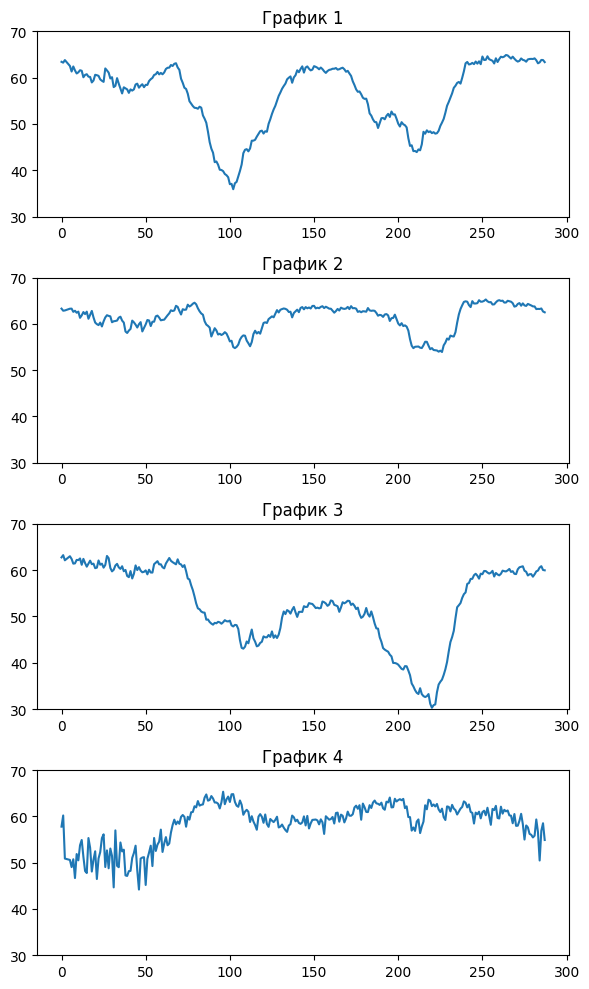

In [28]:
fig, axes = plt.subplots(4, 1, figsize=(6, 10))  # Создаем 4 подграфика

for i in range(4):
    axes[i].plot(speed_matrix[list(c[i])][:288].mean(axis=1))  # Рисуем на каждом подграфике
    axes[i].set_ylim(30, 70)
    axes[i].set_title(f'График {i+1}')  # Задаем заголовок для каждого графика

plt.tight_layout()  # Корректируем расстояния между графиками
plt.show()

In [ ]:

# Если planar_layout не сработает (граф не планарный), используем kamada_kawai_layout
pos = nx.kamada_kawai_layout(G)

# Функция для получения цвета
def get_color(value):
    return plt.cm.viridis(value)

# Находим максимальное значение скорости
max_speed = speed_matrix.max().max()

# Создание цветовой шкалы
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max_speed))
sm.set_array([])

# Выберем узел для отображения загруженности (например, первый узел)
node_to_plot = 0

# Рассчитываем среднее значение по всем узлам
average_speed = speed_matrix.mean(axis=1)

# Создание кадров для GIF
filenames = []
for t in range(0, 288+1):  # По времени (строки матрицы)
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 1, height_ratios=[3, 0.01, 1])

    # Верхний график (граф)
    ax_graph = fig.add_subplot(gs[0])
    часы = (t * 5) // 60
    минуты = (t * 5) % 60
    ax_graph.set_title(f'Время: {часы:02d}:{минуты:02d}')
    node_colors = [get_color(speed_matrix.iloc[t, i] / max_speed) for i in G.nodes()]
    
    nx.draw(G, pos, ax=ax_graph, with_labels=False, node_color=node_colors, node_size=120, font_size=6, 
        edge_color='gray', width=0.5, alpha=0.7)

    # Добавление цветовой шкалы
    cbar = fig.colorbar(sm, ax=ax_graph)
    cbar.set_label('Скорость (км/час)')
    
    # Нижний график (средняя загруженность всех узлов)
    ax_load = fig.add_subplot(gs[2])
    ax_load.plot(range(len(average_speed)), average_speed)
    ax_load.set_xlabel('Шаг')
    ax_load.set_ylabel('Средняя скорость (км/час)')
    ax_load.set_title('Средняя загруженность всех узлов')
    
    # Добавление вертикальной линии
    ax_load.axvline(x=t, color='red', linestyle='--')
    
    # Настройка диапазона осей
    ax_load.set_xlim(0, len(average_speed) - 1)
    ax_load.set_ylim(0, max_speed)

    plt.tight_layout()
    
    filename = f'data/img/frame_{t}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close(fig)

# Создание GIF
with imageio.get_writer('graph_animation.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Очистка временных файлов
import os
for filename in filenames:
    os.remove(filename)

print("GIF создан!")